In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

%matplotlib inline

Эти данные содержат название для 1895 игр с рейтинговым контентом ESRB с именем и консолью в качестве функций для каждой игры.

Одна точка данных представлена в виде двоичного значения 0-1 для консоли: 0 = PS4, 1 = PS4 & Xbox_one и двоичного вектора для функций содержимого ESRB: 0 = no,1 = yes.

 RP, EC, A, рейтинг не указан в этом дата сете.
 
 Колонки
 - title (Название игры)
 
 - console (консоль на которую вышла игра)
 - esrb_rating (рейтинг игры по ESRB)
 Остальные колонки - бинарные данные (содержит ли в себе игра данный контент, например соержатся ли в игре насилие или нет ):
  - RP 	Rating Pending
  - EC 	Early Childhood
  - E 	Everyone
  - E 10+ 	Everyone 10+
  - T 	Teen
  - M 	Mature
  - A 	Adult

In [2]:
data = pd.read_csv('../csv/Video_games_esrb_rating.csv')
data.head(10)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
7,Blightbound,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,T
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,T


1) Поменяем тип колонки console с бинарных на строковую в соответвии с описание датасета

In [3]:
data = data.astype({'console': np.str})
data['console'] = np.where((data.console == '0'), 'PS4', data.console)
data['console'] = np.where((data.console == '1'), 'PS4 & Xbox_one', data.console)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [4]:
data.console

0       PS4 & Xbox_one
1       PS4 & Xbox_one
2       PS4 & Xbox_one
3                  PS4
4                  PS4
             ...      
1890               PS4
1891               PS4
1892               PS4
1893               PS4
1894    PS4 & Xbox_one
Name: console, Length: 1895, dtype: object

2) Определим сколько игр еще не получило ESRB рейтинг (RP)

Определяем что поле esrb_rating не содержит пустых полей, иначе если пустое меняем это значение на RP

In [5]:
data.esrb_rating.isnull().values.any()

False

Пустых полей нет 

In [6]:
data[(data.esrb_rating == 'RP')].shape[0]

0

ВЫВОД: Как видно всем играм датасета комиссия ESRB успела присвоить рейтинг.

3) Поменяем  esrb_rating с категориальных переменных на числовые начиная от детских и заканчивая взрослыми играми

In [7]:
cleanup_nums = {
                "esrb_rating": {"EC":0, "E":1, "ET":2, 
                                    "T":3, "M":4, "A":5}}
data = data.replace(cleanup_nums)

4) Гистограмма игр по рейтингам у которых нет описания контента

Для начала создаем датафрейм с играми без описания контента

In [8]:
no_descr_data = data[(data.no_descriptors == 0)]
no_descr_data

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1,Subnautica: Below Zero,PS4 & Xbox_one,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,NIER REPLICANT VER.1.22474487139…,PS4 & Xbox_one,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,4
3,Jamestown+,PS4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,Neptunia Virtual Stars,PS4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3
6,Monochrome Order,PS4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Absolver,PS4 & Xbox_one,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
1889,Obduction,PS4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1890,SENRAN KAGURA Peach Beach Splash,PS4,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,4
1891,Sneaky Bears,PS4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


Далее строим гистограмму по рейтингам для созданного дата фрейма

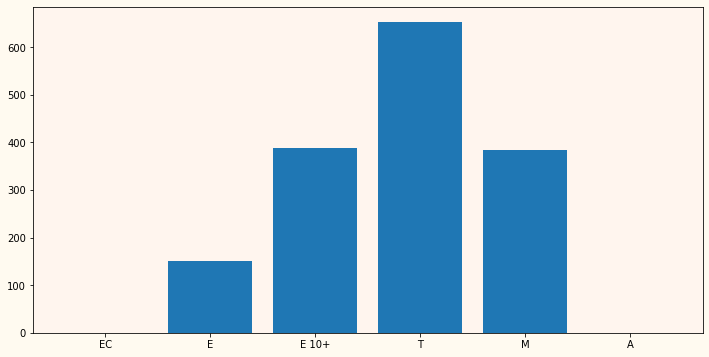

In [9]:
x_esrb_rating = ['EC', 'E', 'E 10+', 'T', 'M', 'A']
y_esrb_rating = [no_descr_data[no_descr_data.esrb_rating == 0].shape[0], no_descr_data[no_descr_data.esrb_rating == 1].shape[0], no_descr_data[no_descr_data.esrb_rating == 2].shape[0],no_descr_data[no_descr_data.esrb_rating == 3].shape[0], no_descr_data[no_descr_data.esrb_rating == 4].shape[0],no_descr_data[no_descr_data.esrb_rating == 5].shape[0]]
     
fig, ax = plt.subplots()

ax.bar(x_esrb_rating, y_esrb_rating)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

5) Проверим есть ли Cartoon_Violence с рейтингом M и выше

In [10]:
data[(data.cartoon_violence == 1)&(data.esrb_rating >= 4)].shape[0]

0

ВЫВОД: Среди игр для Mature нет игр с мультяшным насилием

6) Какой минимальный рейтинг с играми c sexual_content 

In [11]:
data[(data.sexual_content == 1)].esrb_rating.min()

3

ВЫВОД: 3 соответвует рейтингу T. То есть  sexual_content встречается в играх с рейтингом T

7)Как много игр для PS4 с рейтингом E 10+

In [13]:
data[(data.console == 'PS4')&(data.esrb_rating >= 1)].shape[0]

994

ВЫВОД: на PS4 много игр для детей

8)Есть ли animated_blood в детских играх(рейтинг меньший чем M)

In [14]:
data[(data.animated_blood == 1)&(data.esrb_rating < 4)].shape[0]

19

ВЫВОД: в 19 детских играх есть анимированная кровь

9)Как много игр c Suggestive_Themes с рейтингом меньшим чем M

In [16]:
data[(data.suggestive_themes == 1)&(data.esrb_rating < 4)].shape[0]

184

ВЫВОД: в 184 детских играх поднимаются провокационные темы

10) Какой процент игр с use_of_drugs_and_alcohol, strong_janguage , intense_violence , blood_and_gore от общего числа игр и какой рейтинг у них доминирует.

In [26]:
data[(data.use_of_drugs_and_alcohol == 1)&(data.strong_janguage == 1)&(data.intense_violence == 1)&(data. blood_and_gore  == 1)].shape[0]/data.shape[0]

0.0

ВЫВОД: таких игр нет

11)Какой рейтинг у Cyberpunk 2077

In [27]:
data[(data.title == 'Cyberpunk 2077')].esrb_rating

275    4
Name: esrb_rating, dtype: int64

ВЫВОД: рейтинг 4, т.е. M